In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sys

#za prikaz podataka
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [23]:
def preprocess_data(df):
    #PRAVLJENJE DUMMIES KLASA ZA ONE HOT ENCODING
    sex_dummy = pd.get_dummies(df.sex)
    address_dummy = pd.get_dummies(df.address)
    famsize_dummy = pd.get_dummies(df.famsize)
    pstatus_dummy = pd.get_dummies(df.Pstatus)
    reason_dummy = pd.get_dummies(df.reason)
    guardian_dummy = pd.get_dummies(df.guardian)
    schoolsup_dummy = pd.get_dummies(df.schoolsup)
    famsup_dummy = pd.get_dummies(df.famsup)
    paid_dummy = pd.get_dummies(df.paid)
    activities_dummy = pd.get_dummies(df.activities)
    higher_dummy = pd.get_dummies(df.higher)
    internet_dummy = pd.get_dummies(df.internet)
    romantic_dummy = pd.get_dummies(df.romantic)
    
    #SVE MERGOVANO TREBA DA SE IZBACI NEPOTREBNO DA SE IZBJEGNE DUMMY TRAP
    merged = pd.concat([df,sex_dummy,address_dummy,famsize_dummy,pstatus_dummy,reason_dummy,
                    guardian_dummy,schoolsup_dummy,famsup_dummy,paid_dummy,activities_dummy,
                    higher_dummy,internet_dummy,romantic_dummy],axis='columns')
    
    
    #PRAVLJENJE DUMMY DATA FRAMOVA I IZBACIVANJE PO JEDNE KOLONE IZ SVAKOG KAKO
    #BI SE IZBEGAO DUMMY TRAP
    sex_dummy = pd.get_dummies(df.sex)
    sex_dummy_dropped_one = sex_dummy.drop(['F'], axis='columns')
    sex_dummy_dropped_one.columns = ['sex_M']

    address_dummy = pd.get_dummies(df.address)
    address_dummy_dropped_one = address_dummy.drop(['R'], axis='columns')
    address_dummy_dropped_one.columns = ['addres_U']

    famsize_dummy = pd.get_dummies(df.famsize)
    famsize_dummy_dropped_one = famsize_dummy.drop(['LE3'], axis='columns')
    famsize_dummy_dropped_one.columns = ['famsize_GT3']

    pstatus_dummy = pd.get_dummies(df.Pstatus)
    pstatus_dummy_dropped_one = pstatus_dummy.drop(['A'], axis='columns')
    pstatus_dummy_dropped_one.columns = ['pstatus_T']

    reason_dummy = pd.get_dummies(df.reason)
    reason_dummy_dropped_one = reason_dummy.drop(['other'], axis='columns')
    reason_dummy_dropped_one.columns = ['reason_home', 'reason_reputation', 'reason_course']

    guardian_dummy = pd.get_dummies(df.guardian)
    guardian_dummy_dropped_one = guardian_dummy.drop(['other'], axis='columns')
    guardian_dummy_dropped_one.columns = ['guardian_mother', 'guardian_father']

    schoolsup_dummy = pd.get_dummies(df.schoolsup)
    schoolsup_dummy_dropped_one = schoolsup_dummy.drop(['no'], axis='columns')
    schoolsup_dummy_dropped_one.columns = ['schoolsup_yes']

    famsup_dummy = pd.get_dummies(df.famsup)
    famsup_dummy_dropped_one = famsup_dummy.drop(['no'], axis='columns')
    famsup_dummy_dropped_one.columns = ['famsup_yes']

    paid_dummy = pd.get_dummies(df.paid)
    paid_dummy_dropped_one = paid_dummy.drop(['no'], axis='columns')
    paid_dummy_dropped_one.columns = ['paid_yes']

    activities_dummy = pd.get_dummies(df.activities)
    activities_dummy_dropped_one = activities_dummy.drop(['no'], axis='columns')
    activities_dummy_dropped_one.columns = ['activities_yes']

    higher_dummy = pd.get_dummies(df.higher)
    higher_dummy_dropped_one = higher_dummy.drop(['no'], axis='columns')
    higher_dummy_dropped_one.columns = ['higher_yes']

    internet_dummy = pd.get_dummies(df.internet)
    internet_dummy_dropped_one = internet_dummy.drop(['no'], axis='columns')
    internet_dummy_dropped_one.columns = ['internet_yes']

    romantic_dummy = pd.get_dummies(df.romantic)
    romantic_dummy_dropped_one = romantic_dummy.drop(['no'], axis='columns')
    romantic_dummy_dropped_one.columns = ['romantic_yes']
                                          
    #MERGOVANJE DUMMY DATA FRAMOVA SA PODACIMA
    merged = pd.concat([df,sex_dummy_dropped_one,address_dummy_dropped_one,famsize_dummy_dropped_one,
                   pstatus_dummy_dropped_one,reason_dummy_dropped_one,guardian_dummy_dropped_one,
                   schoolsup_dummy_dropped_one,famsup_dummy_dropped_one,paid_dummy_dropped_one,
                   activities_dummy_dropped_one,higher_dummy_dropped_one,internet_dummy_dropped_one,
                   romantic_dummy_dropped_one], axis = 'columns')

    #IZBACIVANJE KOLONA OD KOJE SU IZVEDENE DUMMY DATA FRAMOVI
    final_df = merged.drop(['sex','address','famsize', 'Pstatus','reason',
                            'guardian','schoolsup','famsup','paid','activities',
                            'higher','internet','romantic'], axis='columns')
                                          
    return final_df

In [4]:
from random import seed
from random import randrange

# Split a dataset into a train and test set
def train_test_split_random(dataset, data_size,split=0.7):
    
    train_size_counter = 0
    indices = []
    train = pd.DataFrame()
    train_size = 0.6 * data_size
    dataframe_copy = dataset
    while train_size_counter < train_size:
        train_size_counter = train_size_counter + 1
        index = randrange(data_size)
        indices.append(index)
    
    for i in range(len(indices)):
        train = train.append(dataframe_copy.iloc[[i]])
        
    dataframe_copy.drop(labels = indices, axis=0)
    
    return train, dataframe_copy
    
#SORTED 80/20    
def train_test_split_sorted(dataset, data_size):
    
    sorted_df = dataset.sort_values(by=['Grade'])
    train_counter = 1
    indices = []
    train = pd.DataFrame()
    dataframe_copy = dataset
    
    for i in range(data_size):
        if train_counter == 5:
            indices.append(i)
            train_counter = 1
        
        train_counter = train_counter + 1
        
    for i in range(len(indices)):
        train = train.append(dataframe_copy.iloc[[i]])
        
    dataframe_copy.drop(labels = indices, axis=0)
    
    return train, dataframe_copy      

In [5]:
#DA IZBACI 0 I 1 DA NE DOBIJEMO POGRESNE REZULTATE JER SE MOGU SMATRATI OUTLIERIMA
def take_out_0_1(df):
    indices = []
    for index, row in df.iterrows():
        x = row['Grade']
        if x == 0 or x == 1:
            indices.append(index)
    
    data = df.drop(labels=indices, axis=0)
    return data

def thresholding(value):
    if value == 0:
        return 0
    elif value > 0:
        return 1.0
    else:
        return -1.0
    
    
def mse(y_actual, y_predicted):
    n = len(y_actual)
    s = 0.0
    for i in range(n):
        s += (y_predicted[i] - y_actual[i]) ** 2
    loss = s / n
    return loss


def rmse(y_actual, y_predicted):
    return np.sqrt(mse(y_actual, y_predicted))


In [6]:
class ElasticNetRegression(object):
    
    def __init__(self, learning_rate=0.01, rho_value=0.1, n_iterations=2000, weights=None):
        self.n_iterations = n_iterations
        self.weights = weights
        self.learning_rate = learning_rate
        self.rho_value = rho_value

    def preprocess_coordinate_descent(self, x):
        m, n = x.shape  # m - number of examples, n - number of features
        l2_regularization_parameter = m * self.learning_rate * (1.0 - self.rho_value)
        l1_regularization_parameter = m * self.learning_rate * self.rho_value
        self.weights = np.zeros(n)
        # Return an array (ndim >= 1) laid out in Fortran order in memory, for a little bit of a faster computing.
        x = np.asfortranarray(x)
        return x, l1_regularization_parameter, l2_regularization_parameter

    def fit(self, x, y):
        init_step = True
        x, l1, l2 = self.preprocess_coordinate_descent(x)
        xy_dot = np.dot(x.T, y)
        n = x.shape[1]  # number of features
        feature_set = set(range(n))
        feature_correlations = np.zeros(shape=(n, n))
        get_norm = np.sum(x**2, axis=0)
        grads = np.zeros(n)

        for i in range(self.n_iterations):
            for j in feature_set:
                weights = self.weights[j]
                if init_step:
                    feature_correlations[:, j] = np.dot(x[:, j], x)
                    grads[j] = xy_dot[j] - np.dot(feature_correlations[:, j], self.weights)

                self.weights[j] = thresholding(grads[j] + weights * get_norm[j]) * max(
                    abs(grads[j] + weights * get_norm[j]) - l2, 0) / (get_norm[j] + l1)

                if weights != self.weights[j]:
                    for k in feature_set:
                        if self.n_iterations >= 1 or k <= j:
                            grads[k] -= feature_correlations[j, k] * (self.weights[j] - weights)

            init_step = False

            feature_set_copy = set.copy(feature_set)
            for f in feature_set_copy:
                if self.weights[f] == 0:
                    feature_set.remove(f)

    def predict(self, x):
        return x @ self.weights.T

In [38]:
import sys
if(len(sys.argv) != 3):
    print("Mora imati dva argumenta 'train.csv' 'test.csv'")
    exit()
else:
    train_csv = sys.argv[1]
    test_csv = sys.argv[2] 

    train = pd.read_csv(train_csv)
    test = pd.read_csv(test_csv)

    final_df_train = preprocess_data(train)
    final_df_test = preprocess_data(test)

    #final_df = take_out_0_1(final_df)
    #final_df = final_df.reset_index(drop=True)

    #TRAIN TEST SPLIT
    #seed(1)
    #train, test = train_test_split_random(final_df, df_size, 0.7)

    #df_size = final_df[final_df.columns[0]].count() -1
    #train, test = train_test_split_sorted(final_df, df_size)
    #Y_train = train['Grade']
    #X_train = train[[i for i in list(train.columns) if i != 'Grade']]

    #Y_test = test['Grade']
    #X_test = test[[i for i in list(train.columns) if i != 'Grade']]

    Y_train = final_df_train['Grade']
    X_train = final_df_train[[i for i in list(final_df_train.columns) if i != 'Grade']]

    Y_test = final_df_test['Grade']
    X_test = final_df_test[[i for i in list(final_df_test.columns) if i != 'Grade']]


    elastic_net_model = ElasticNetRegression(rho_value=0.003) #0.03  # bigger means more Ridge factor
    elastic_net_model.fit(X_train, Y_train)
    y_pred = elastic_net_model.predict(X_test)

    rmserr = rmse(Y_test, y_pred)
    print(float(rmserr)) 

FileNotFoundError: [Errno 2] File b'-f' does not exist: b'-f'

In [37]:
# train = pd.read_csv('train.csv')
# final_df = preprocess_data(train)

# #final_df = take_out_0_1(final_df)
# #final_df = final_df.reset_index(drop=True)

# #Izbacivanje kategorijskih podatak iz dataframe za prikazivanje korelacije
# heatmap_view = final_df.drop(['sex_M','addres_U','famsize_GT3','pstatus_T','reason_home', 'reason_reputation',
# 'reason_course','guardian_mother', 'guardian_father','schoolsup_yes','famsup_yes',
# 'paid_yes','activities_yes','higher_yes','internet_yes','romantic_yes'], axis='columns')

# #ISCRTAVANJE HEAT MAPE RADI ANALIZE PODATAKA
# corr = heatmap_view.corr()
# mask = np.zeros_like(heatmap_view.corr())
# triangle_indices = np.triu_indices_from(mask)
# mask[triangle_indices] = True

# plt.figure(figsize=(16,10))
# sns.heatmap(heatmap_view.corr(),cmap="PiYG", mask=mask, annot=True, annot_kws={"size" : 13})

# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

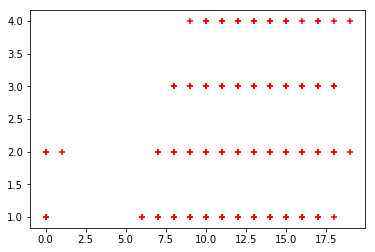

In [39]:
# #ISCRTAVANJE JEDNOG PO JEDNOG PLOTA DA SE VIDI DA LI IMA OUTLIERA
# %matplotlib inline
# df = pd.read_csv('train.csv')
# plt.xlabel('Grade')
# plt.ylabel('')
#plt.scatter(df.Grade,df.sex, color='red', marker='+')
#plt.scatter(df.Grade,df.address, color='red', marker='+')
#plt.scatter(df.Grade,df.famsize, color='red', marker='+')
#plt.scatter(df.Grade,df.Pstatus, color='red', marker='+')
#plt.scatter(df.Grade,df.reason, color='red', marker='+')
#plt.scatter(df.Grade,df.guardian, color='red', marker='+')
##plt.scatter(df.Grade,df.schooolsup, color='red', marker='+')
#plt.scatter(df.Grade,df.famsup, color='red', marker='+')
#plt.scatter(df.Grade,df.paid, color='red', marker='+')
#plt.scatter(df.Grade,df.activities, color='red', marker='+')
#plt.scatter(df.Grade,df.higher, color='red', marker='+')
#plt.scatter(df.Grade,df.internet, color='red', marker='+')
#plt.scatter(df.Grade,df.romantic, color='red', marker='+')


#plt.scatter(df.age,df.Grade, color='red', marker='+')
#plt.scatter(df.Medu,df.Grade, color='red', marker='+')
#plt.scatter(df.Grade,df.Fedu, color='red', marker='+')
#plt.scatter(df.Grade,df.traveltime, color='red', marker='+')
plt.scatter(df.Grade,df.studytime, color='red', marker='+')
#plt.scatter(df.Grade,df.failures, color='red', marker='+')
#plt.scatter(df.Grade,df.famrel, color='red', marker='+')
#plt.scatter(df.Grade,df.goout, color='red', marker='+')
#plt.scatter(df.Grade,df.Dalc, color='red', marker='+')
#plt.scatter(df.Grade,df.Walc, color='red', marker='+')
#plt.scatter(df.Grade,df.health, color='red', marker='+')
##plt.scatter(df.Grade,df.absence, color='red', marker='+')